In [2]:
%matplotlib inline
import plot
import market
import metrics
from decimal import Decimal
import pandas
import simulate

In [3]:
class Method:
    def __init__(self, portfolio=1_000_000, base_income=20_000):
        self.age = 65
        self.final_age = 100
        self.income = Decimal(base_income)
        self.lmp = Decimal(self.income) * Decimal(self.final_age - self.age)
        assert self.lmp <= portfolio
        self.rp = portfolio - self.lmp
        
    def start(self):
        return self.income
    
    def next(self, change):
        self.age += 1

        # do all math in real, not nominal, terms
        real_change = ((1 + change.stocks) / (1 + change.inflation)) - 1
        rmd_ratio = Decimal(1) / Decimal(self.final_age - self.age)

        # consume the gains and put them in LMP
        delta = self.rp * real_change
        # consume part of the RP principal
        p = self.rp * rmd_ratio
        delta += p
        self.rp -= p
        self.lmp += delta
        self.income += delta * rmd_ratio
        
        assert self.rp >= 0, self.rp
        assert self.lmp >= 0, self.lmp
        
        return self.income

In [4]:
def run(year):
    bm = Method()
    w = []
    w.append(bm.start())
    for _, d in zip(range(years - 1), m.iter_from(year)):
        w.append(bm.next(d))
    return w

In [5]:
m = market.Returns_US_1871()
years = 35
start_year = 1871
last_year = 2018-years
YEAR = 1950

In [6]:
bm_ws_r = run(YEAR)

In [7]:
ws = simulate.withdrawals(m.iter_from(YEAR), portfolio=(300_000, 700_000))
ws_r = [n.withdraw_r for n in ws]

/Users/justus/Dropbox/jupyter/prime-harvesting/plot.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_n = fig.add_subplot(111, sharex=ax, sharey=ax)


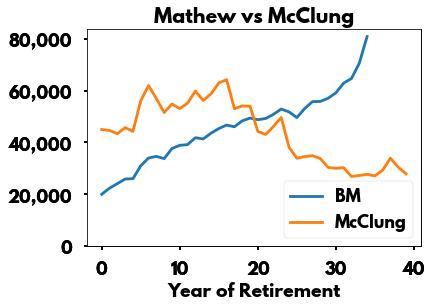

In [8]:
plot.plot_n({'BM': bm_ws_r, 'McClung' : ws_r},
           xlabel = 'Year of Retirement', title = 'Mathew vs McClung')

In [15]:
[n.portfolio_pre.value_r for n in simulate.withdrawals(m.iter_from(1966))]

[Decimal('1.00000E+6'),
 Decimal('880820.4084768231720796465651'),
 Decimal('936272.9225743042253769196777'),
 Decimal('924652.0902513305566976094294'),
 Decimal('772536.6508230083155637842781'),
 Decimal('744857.1629238784033359336280'),
 Decimal('774620.3319204041233914355400'),
 Decimal('830000.3431506691484128884429'),
 Decimal('633352.0423831715058705310258'),
 Decimal('403290.0057985279304613718045'),
 Decimal('482287.5195663045830285537422'),
 Decimal('535473.0050493920491314761666'),
 Decimal('434740.2599950759488779237687'),
 Decimal('396439.7975429581873401080183'),
 Decimal('387049.6488960962578091222491'),
 Decimal('424740.3448521981712139920254'),
 Decimal('345251.1226413011165201882362'),
 Decimal('374496.7663271371758247477767'),
 Decimal('407449.1998538239262394914353'),
 Decimal('386763.2069992620343543402281'),
 Decimal('452295.0860415824581822206133'),
 Decimal('488642.5616572757210371937107'),
 Decimal('455407.9992529424922237314794'),
 Decimal('468796.3509606196685